In [1]:
%matplotlib notebook

from numpy import *
from os import path
home = path.expanduser("~")

import matplotlib.pyplot as plt

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6., 4.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

EPS = 1e-16  # a small number

working_path = path.join(home, "JETSCAPE", "JShydro")

In [2]:
class SimpleHistogram:
    """A simple histogram class"""
    def __init__(self, x_min, x_max, nx):
        self.x_min_ = x_min
        self.x_max_ = x_max
        self.nx_ = nx
        self.dx_ = (x_max - x_min)/nx
        self.bin_x_ = zeros(nx)
        for i in range(nx):
            self.bin_x_[i] = x_min + (i+0.5)*self.dx_
        self.bin_y_ = zeros(nx)
    
    def fill(self, x_in, val):
        idx = int((x_in - self.x_min_)/self.dx_)
        if idx >= 0 and idx < self.nx_:
            self.bin_y_[idx] += val

In [3]:
data_filename = "hadron_list.dat"
nev = 0
event_list = []
with open(path.join(working_path, data_filename)) as fp:
    line = fp.readline()  # read in the header
    while line:
        nparticles = int(line.split()[3])
        event_i = []
        for ipart in range(nparticles):
            line = fp.readline()
            event_i.append(array([float(i) for i in line.split()]))
        event_list.append(array(event_i))
        nev += 1
        # print("Event {} has {} particles".format(nev, nparticles))
        line = fp.readline()  # read in the header
print("Read in total {} events.".format(nev))

Read in total 10 events.


In [4]:
pTSpectra = SimpleHistogram(0.0, 3.0, 31)
v2diff_real = SimpleHistogram(0.0, 3.0, 31)
v2diff_imag = SimpleHistogram(0.0, 3.0, 31)
pid = 211  # specify the particle id
for event_i in event_list:
    npart, ncol = event_i.shape
    for ipart in range(npart):
        if event_i[ipart][1] != pid: continue
        if event_i[ipart][3] > event_i[ipart][6]:
            # compute the particle rapidity
            y = 0.5*log((event_i[ipart][3] + event_i[ipart][6])
                        /(event_i[ipart][3] - event_i[ipart][6] + EPS))
            # compute particle pT
            pT = sqrt(event_i[ipart][4]**2 + event_i[ipart][5]**2.)
            # compute particle phi
            phi = arctan2(event_i[ipart][5], event_i[ipart][4])
            if y < 1.0 and y > -1.0:  # select the rapidity acceptance
                pTSpectra.fill(pT, 1.)
                v2diff_real.fill(pT, cos(2.*phi))
                v2diff_imag.fill(pT, sin(2.*phi))
v2diff_real.bin_y_ = v2diff_real.bin_y_/pTSpectra.bin_y_
v2diff_imag.bin_y_ = v2diff_imag.bin_y_/pTSpectra.bin_y_
v2diff = sqrt(v2diff_real.bin_y_**2. + v2diff_imag.bin_y_**2.)

delta_y = 2.
delta_pT = pTSpectra.bin_x_[1] - pTSpectra.bin_x_[0]
pTSpectra.bin_y_ /= (nev*delta_y*delta_pT)   # divide spectra by dy and dpT

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


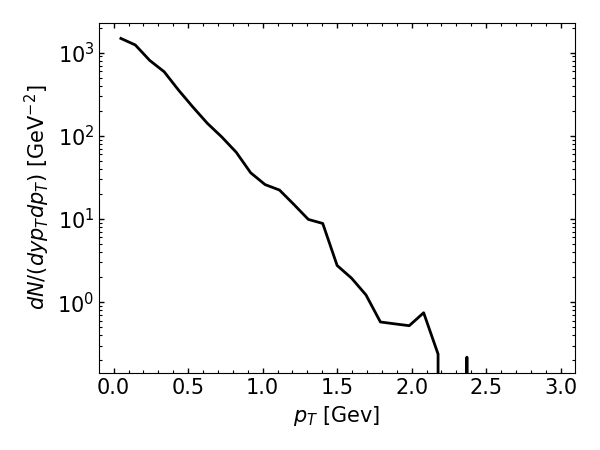

In [6]:
fig = plt.figure()

plt.plot(pTSpectra.bin_x_, pTSpectra.bin_y_/pTSpectra.bin_x_, '-k')

#plt.legend(loc=0)
plt.xlabel(r"$p_T$ [Gev]")
plt.ylabel(r"$dN/(dy p_T dp_T)$ [GeV$^{-2}$]")
plt.yscale("log")
plt.tight_layout()

# save plot to the Desktop
#plt.savefig('pTSpectra')

<IPython.core.display.Javascript object>


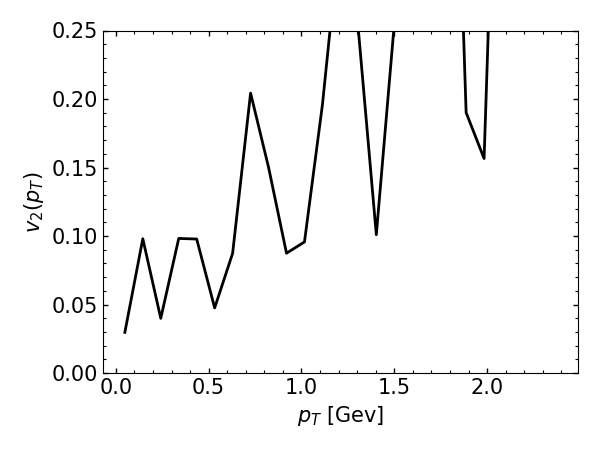

In [7]:
fig = plt.figure()

plt.plot(v2diff_real.bin_x_, v2diff, '-k')

#plt.legend(loc=0)
plt.xlabel(r"$p_T$ [Gev]")
plt.ylabel(r"$v_2(p_T)$")
plt.ylim([0., 0.25])
plt.tight_layout()

# save plot to the Desktop
#plt.savefig('v2_pTdiff')